# $R^2$ Explained

### Generating Random Data

In this notebook, I will try to explain $R^2$ graphically and then mathematically. Let's start by generating some random data. Our data will generally follow the formula $y=0.6x-4$ with a noise term added to each term.

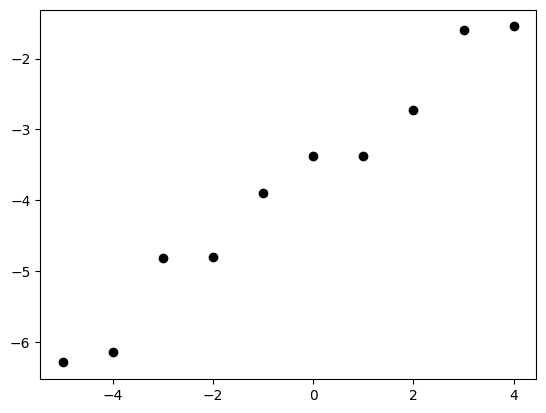

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from prettytable import PrettyTable
np.random.seed(320)

fig, ax = plt.subplots()

# Let's generate some data. We will follow a line given by: y = 0.6x - 4, 
# and we will add noise to each value.
df = pd.DataFrame({"x" : np.arange(-5, 5)})

# Note that the np.random.uniform is our noise. It generates a random float
# between 0 and 1.
df["y"] = 0.6 * df["x"] - 4 + np.random.uniform(size=(10))
ax.scatter(x=df["x"], y=df["y"], c="black", zorder=25)
plt.show()

### Fitting our LinearRegression and our Naive Model

Let's next continue by fitting two models to our data. We will fit a LinearRegression model, and then a naive model. In this case, our naive model is just a horizontal line at the mean of our dataset. In our case, this is a line with the formula $y=-3.855$ approximately.

In [2]:
from sklearn.linear_model import LinearRegression
# Fitting model 1
lm = LinearRegression()
lm.fit(df[["x"]], df["y"])

# Let's see how much of the variance we are able to predict. Why isn't it 1?
lm.score(df[["x"]], df["y"])

0.9703351109685636

In [3]:
# Fitting model 2

# We don't have a naive model, so let's create one!
class NaiveModel:
    # Our fit takes in an X and y, and then sets out intercept to be the mean value of y.
    def fit(self, X, y):
        self.intercept_ = np.mean(y)
        return self
        
    # Our predict simply predicts this mean value for each of our values.
    def predict(self, X):
        return np.ones(X.shape[0]) * self.intercept_
    
    def score(self, X, y):
        y_pred = self.predict(X)
        SS_total = sum( (y - y_pred) ** 2 ) # sum of the square differences
        return 1 - (SS_total / SS_total) # This should ALWAYS be 0. Why?
    
# Let's fit it
nm = NaiveModel()
nm.fit(df[["x"]], df["y"])
nm.score(df[["x"]], df["y"])

0.0

We can see that our linear model performs quite well, and is able to account for $97$% of the variance. It isn't able to account for $100$% of the variance because we added the noise term. Our naive model on the other hand explains $0$% of the variance. This is because it is simply a horizontal line at the mean, and thus fails to account for our underlying trend. Let's plot these. We will see that our linear model seems to follow our data much better even visually, which is what we would expect.

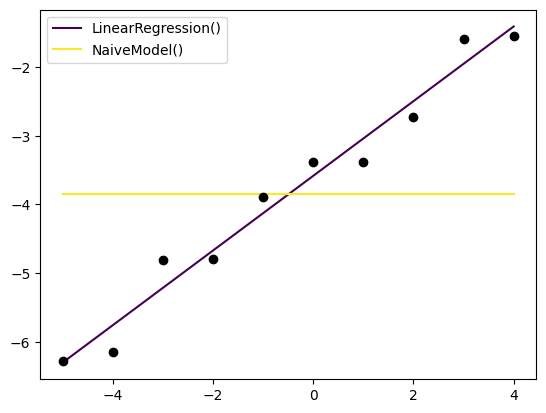

In [4]:
ax.plot(df["x"], lm.predict(df[["x"]]), c="#440154", label="LinearRegression()")
ax.plot(df["x"], nm.predict(df["x"]), c="#FDE725", label="NaiveModel()")
ax.legend()
fig

### But how can $R^2$ be negative?

So, we've seen what it means for a model to be good, and we've seen why a naive approach gives us a score of 0 (at least graphically), but what about a *really bad* model. To achieve this, we will create a linear model as we did before. The only exception is that we will flip the sign of the slope/coef and change the intercept to be -1.

In [5]:
# Fitting bad model
lm_bad = LinearRegression()
lm_bad.fit(df[["x"]], df["y"])
lm_bad.coef_ = -1 * lm_bad.coef_
lm_bad.incercept_ = -1

# Let's see how much of the variance we are able to predict.
lm_bad.score(df[["x"]], df["y"])

-3.02862170999279

There is our negative value. But how does this look graphically? We will notice that our new `BadModel()` as I have dubbed it is very bad at explaining our variance. Graphically, this means that our bad model doesn't seem to "flow" with our data. And, when looking at the graph, this is certainly evident. 

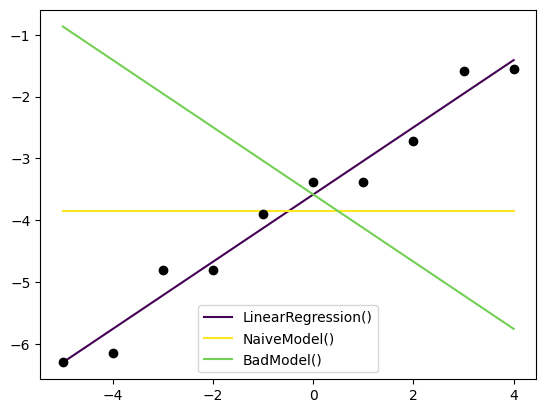

In [6]:
ax.plot(df["x"], lm_bad.predict(df[["x"]]), c="#73D055", label="BadModel()")
ax.legend()
fig

### Graphic $R^2$ Recap

With that, I think we have covered graphically how $R^2$ works. Essentially, if a model follows our data, it has a high $R^2$, if it is pretty close to our naive approach, it will have an $R^2$ of closer to 0 (or 0 if it *is* our naive approach), and then anything that is *worse* than our already bad naive approach will get an $R^2$ that is negative. This is easy to see graphically, but let's talk about the math behind it now

## Math Approach to $R^2$

We can again use our same random data. I will also use our three models to add three columns, one for each of the predicted values of `y` respective to each model.

In [7]:
df["y_lm"] = lm.predict(df[["x"]])
df["y_nm"] = nm.predict(df["x"])
df["y_bad"] = lm_bad.predict(df[["x"]])
df

,x,y,y_lm,y_nm,y_bad
0,-5,-6.285646,-6.300814,-3.854655,-0.864906
1,-4,-6.144033,-5.757223,-3.854655,-1.408497
2,-3,-4.806691,-5.213632,-3.854655,-1.952088
3,-2,-4.799308,-4.670042,-3.854655,-2.495679
4,-1,-3.891588,-4.126451,-3.854655,-3.039269
5,0,-3.377203,-3.582860,-3.854655,-3.582860
6,1,-3.378374,-3.039269,-3.854655,-4.126451
7,2,-2.722891,-2.495679,-3.854655,-4.670042
8,3,-1.592311,-1.952088,-3.854655,-5.213632
9,4,-1.548510,-1.408497,-3.854655,-5.757223


### $R^2$ Formula

Before we calculate the $R^2$ score, we must first define a few other math terms:

**Total Sum of Squares (TSS)**: the sum of the squared differnces between each y and the mean.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Mathematically**: $\mathbf{\text{TSS}} = \Sigma_{i=1}^n(y_i - \bar{y})^2$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**In Code**: `sum( (df["y"] - np.mean(df["y"])) ** 2 )`

**Residual Sum of Squares (RSS)**: the sum of the squared differnces between each y and the predicted value of y.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Mathematically**: $\mathbf{\text{RSS}} = \Sigma_{i=1}^n(y_i - f(x_i))^2$ where $f(x_i)$ is the predicted value of $y$ by some model.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**In Code**: `sum( (df["y"] - df["y_lm"]) ** 2 )`

---

Now that we have those defined, we can define the formula for $R^2$.

$R^2 = 1 - \frac{\mathbf{\text{RSS}}}{\mathbf{\text{TSS}}}$

Let's now calculate $R^2$ for each of our models above and see if they match. I will outline the math here, and then do it in code below.

$R^2_{naive} = 1 - \frac{\mathbf{\text{RSS}}_{naive}}{\mathbf{\text{TSS}}} = 1 - \frac{\mathbf{\text{TSS}}}{\mathbf{\text{TSS}}}$

$R^2_{linear} = 1 - \frac{\mathbf{\text{RSS}}_{linear}}{\mathbf{\text{TSS}}}$

$R^2_{bad} = 1 - \frac{\mathbf{\text{RSS}}_{bad}}{\mathbf{\text{TSS}}}$

In [8]:
tss = sum( (df["y"] - np.mean(df["y"])) ** 2 )
tss

25.12327848966666

In [9]:
# naive R^2
rss_naive = sum( (df["y"] - df["y_nm"]) ** 2 )
print(f"RSS_naive  = {rss_naive}")
r2_naive = 1 - (rss_naive / tss)
print(f"Math R^2   = {r2_naive}")
print(f"Model R^2  = {nm.score(df[['x']], df['y'])}")

RSS_naive  = 25.12327848966666
Math R^2   = 0.0
Model R^2  = 0.0


In [10]:
# linear R^2
rss_linear = sum( (df["y"] - df["y_lm"]) ** 2 )
print(f"RSS_naive  = {rss_linear}")
r2_linear = 1 - (rss_linear / tss)
print(f"Math R^2   = {r2_linear}")
print(f"Model R^2  = {lm.score(df[['x']], df['y'])}")

RSS_naive  = 0.7452792685018332
Math R^2   = 0.9703351109685636
Model R^2  = 0.9703351109685636


In [11]:
# bad R^2
rss_bad = sum( (df["y"] - df["y_bad"]) ** 2 )
print(f"RSS_naive  = {rss_bad}")
r2_bad = 1 - (rss_bad / tss)
print(f"Math R^2   = {r2_bad}")
print(f"Model R^2  = {lm_bad.score(df[['x']], df['y'])}")

RSS_naive  = 101.21218514966597
Math R^2   = -3.0286217099927892
Model R^2  = -3.02862170999279


So, now that you can see how $R^2$ works mathematically, let's talk about *why* we get different scores. As we saw above, the $R^2$ is essentially determined by the ratio of how good our model is when compared to a naive approach. When our model is really good, we will see that its **RSS** is smaller (because the difference between the predicted and actual values will be closer). As such, when dividing this small **RSS** by an arbitrarily larger number, we will expect a small number. Thus, 1 minus this ratio will be close to 1.

When our model is really bad, we will see that the **RSS** is larger (because the difference between the predicted value and the actual values will be larger). This divison of a large number by a smaller number yields a "large" number, and thus subtracting this from 1 yields our negative $R^2$.

In [12]:
t = PrettyTable()
t.field_names = ["Model", "RSS", "Score"]
t.add_row(["Linear", round(rss_linear, 4), round(r2_linear, 4)])
t.add_row(["Naive", round(rss_naive, 4), r2_naive])
t.add_row(["Bad", round(rss_bad, 4), round(r2_bad, 4)])
print(f"TSS = {round(tss, 4)}")
print(t)

TSS = 25.1233
+--------+----------+---------+
| Model  |   RSS    |  Score  |
+--------+----------+---------+
| Linear |  0.7453  |  0.9703 |
| Naive  | 25.1233  |   0.0   |
|  Bad   | 101.2122 | -3.0286 |
+--------+----------+---------+
